In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/Leinadh/avatar-image-generator.git

Cloning into 'avatar-image-generator'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17028 (delta 4), reused 15 (delta 2), pack-reused 17008
Receiving objects: 100% (17028/17028), 655.57 MiB | 34.52 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (17631/17631), done.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tqdm.notebook import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cartoon set info


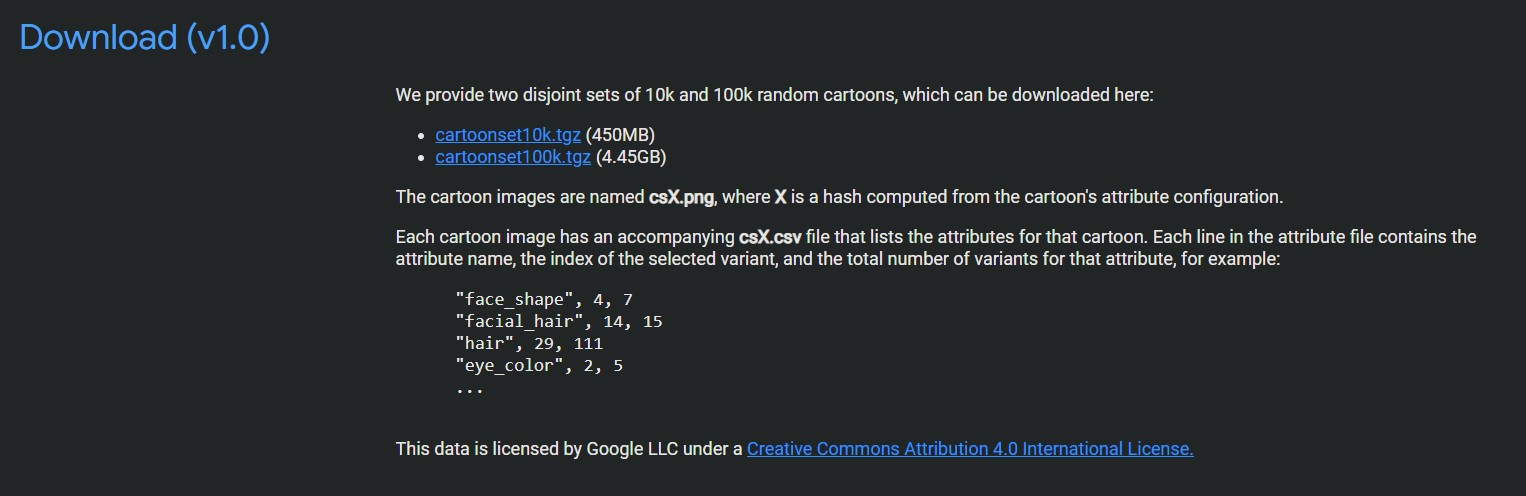

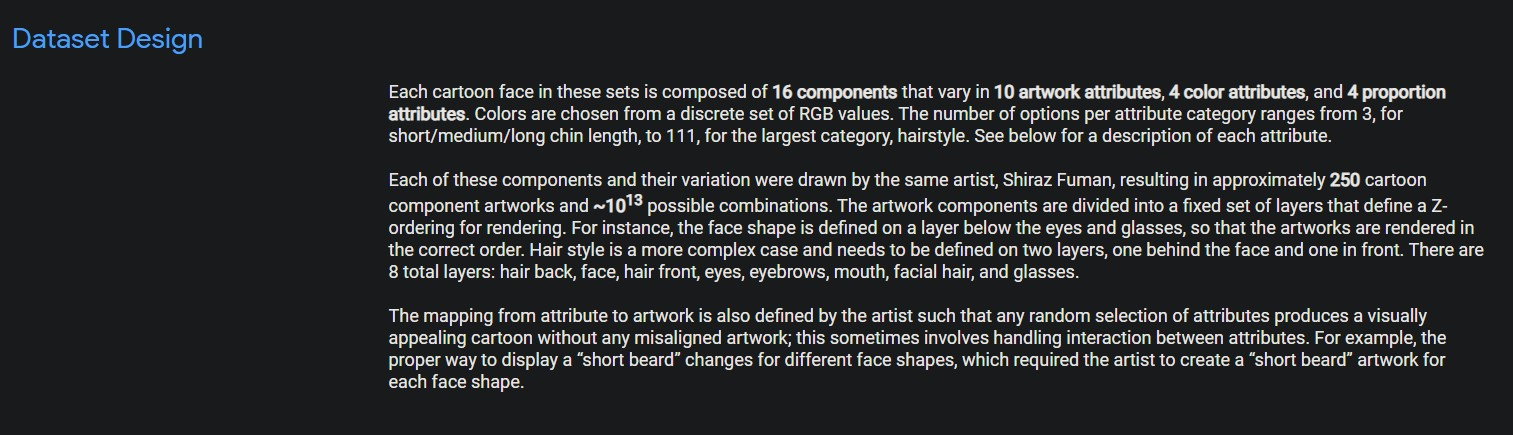

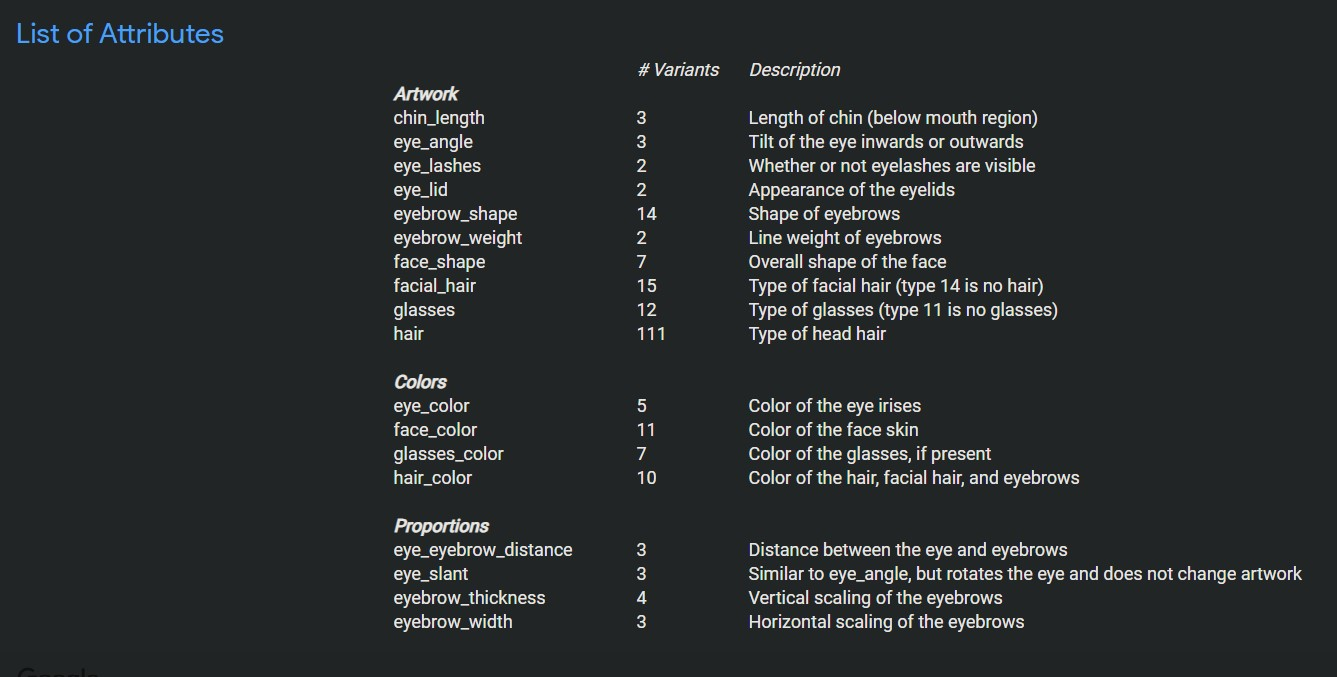

# Create image info dataset


In [ ]:
# os.chdir('/content/drive/My Drive/Made with ML/datasets')
# os.getcwd()

'/content/drive/My Drive/Made with ML/datasets'

In [ ]:
# !tar -zxvf '/content/drive/My Drive/Made with ML/datasets/cartoonset10k.tgz'

In [ ]:
from cartoon_data import cartoon_files_to_df

In [ ]:
path = '/content/drive/My Drive/Made with ML/datasets/'
cartoon_folder = 'cartoonset10k_06-07-2020/'
output_csv_file_name = 'cartoon_dataframe_06-07-2020.csv'
# df_cartoon = cartoon_files_to_df(path+cartoon_folder)
# df_cartoon.to_csv(path+output_csv_file_name, index=False)
# df_cartoon.head()

844it [00:08, 98.67it/s]


,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,file_name,glasses,glasses_color,hair,hair_color
0,2,2,4,1,1,0,1,8,1,1,2,10,4,7,cs10000053986926948907.png,0,3,84,9
1,0,1,4,1,0,0,0,4,1,1,1,3,2,12,cs10000354665834323549.png,1,4,77,2
2,0,2,0,2,0,0,0,9,1,0,1,8,3,14,cs10000417372154603123.png,10,0,40,6
3,0,0,4,2,1,0,2,12,3,1,0,3,6,14,cs10000524080030775394.png,3,1,29,7
4,1,2,2,1,0,1,0,10,2,0,1,10,6,3,cs10000592242416795426.png,10,0,78,0


# Show images distribution


In [ ]:
artwork_total_variants = {
  'chin_length': 3, # Length of chin (below mouth region)
  'eye_angle': 3, # Tilt of the eye inwards or outwards
  'eye_lashes':	2, #	Whether or not eyelashes are visible
  'eye_lid': 2, # Appearance of the eyelids
  'eyebrow_shape': 14, # Shape of eyebrows
  'eyebrow_weight': 2, # Line weight of eyebrows
  'face_shape': 7, # Overall shape of the face
  'facial_hair': 15, # Type of facial hair (type 14 is no hair)
  'glasses': 12, # Type of glasses (type 11 is no glasses)
  'hair': 111 # Type of head hair
}
colors_total_variants = {
  'eye_color': 5, #  Color of the eye irises
  'face_color': 11, #	Color of the face skin
  'glasses_color': 7, #	Color of the glasses, if present
  'hair_color': 10 #	Color of the hair, facial hair, and eyebrows
} 
proportions_total_variants = {
  'eye_eyebrow_distance': 3, #	Distance between the eye and eyebrows
  'eye_slant': 3, #	Similar to eye_angle, but rotates the eye and does not change artwork
  'eyebrow_thickness': 4, #	Vertical scaling of the eyebrows
  'eyebrow_width': 3 #	Horizontal scaling of the eyebrows
}

total_varitants = { # Total number of variants for each attribute
  'artwork': artwork_total_variants,
  'colors': colors_total_variants,
  'proportions': proportions_total_variants
}

In [ ]:
df_cartoonset10k = pd.read_csv('/content/avatar-image-generator/datasets/cartoon_datasets/cartoonset10k_df.csv')

In [ ]:
df_cartoonset10k.head()

,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,file_name,glasses,glasses_color,hair,hair_color
0,2,2,4,1,1,0,1,8,1,1,2,10,4,7,cs10000053986926948907.png,0,3,84,9
1,0,1,4,1,0,0,0,4,1,1,1,3,2,12,cs10000354665834323549.png,1,4,77,2
2,0,2,0,2,0,0,0,9,1,0,1,8,3,14,cs10000417372154603123.png,10,0,40,6
3,0,0,4,2,1,0,2,12,3,1,0,3,6,14,cs10000524080030775394.png,3,1,29,7
4,1,2,2,1,0,1,0,10,2,0,1,10,6,3,cs10000592242416795426.png,10,0,78,0


In [ ]:
df_cartoonset10k.astype('object').describe().transpose()

,count,unique,top,freq
chin_length,10000,3,2,3376
eye_angle,10000,3,1,3381
eye_color,10000,5,1,2020
eye_eyebrow_distance,10000,3,1,3353
eye_lashes,10000,2,0,5013
eye_lid,10000,2,0,5012
eye_slant,10000,3,1,3373
eyebrow_shape,10000,14,11,774
eyebrow_thickness,10000,4,1,2551
eyebrow_weight,10000,2,0,5005


## Artwork distribution



In [ ]:
keys = artwork_total_variants.keys()
df_cartoonset10k[keys].astype('object').describe().transpose()

,count,unique,top,freq
chin_length,10000,3,2,3376
eye_angle,10000,3,1,3381
eye_lashes,10000,2,0,5013
eye_lid,10000,2,0,5012
eyebrow_shape,10000,14,11,774
eyebrow_weight,10000,2,0,5005
face_shape,10000,7,4,1496
facial_hair,10000,15,14,5044
glasses,10000,12,11,4986
hair,10000,111,101,115


In [ ]:
# # Valores
# for key in keys:
#   print(df_cartoonset10k[key].value_counts())

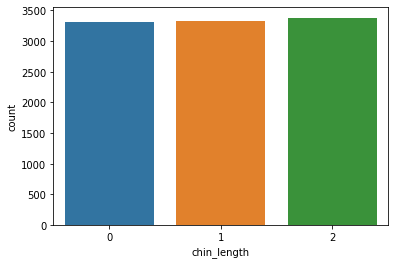

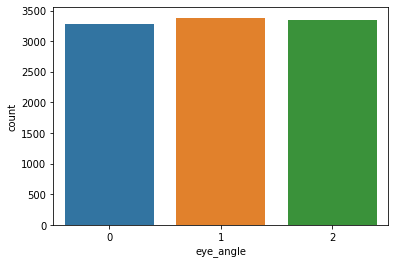

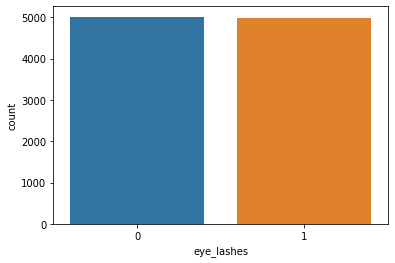

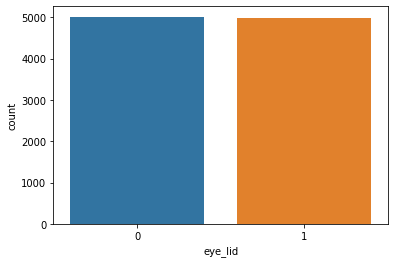

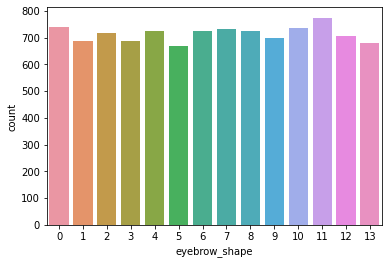

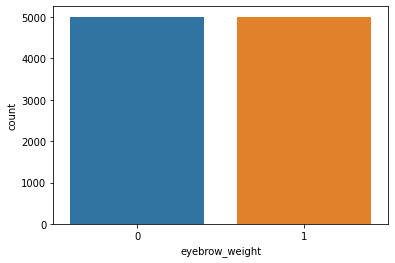

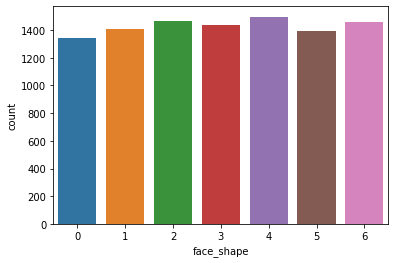

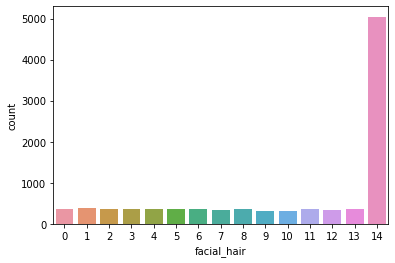

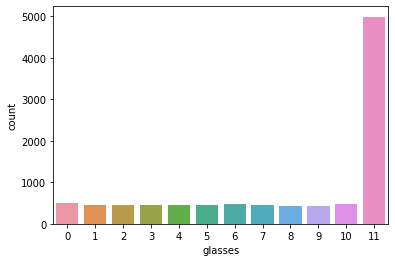

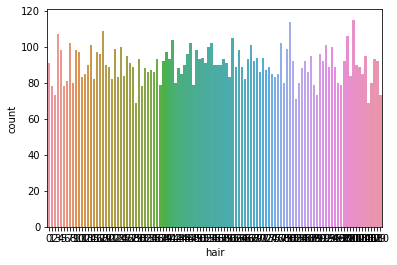

In [ ]:
for i, key in enumerate(keys):
  sns.countplot(df_cartoonset10k[key])
  plt.show()

## Proportions distribution

In [ ]:
keys = proportions_total_variants.keys()
df_cartoonset10k[keys].astype('object').describe().transpose()

,count,unique,top,freq
eye_eyebrow_distance,10000,3,1,3353
eye_slant,10000,3,1,3373
eyebrow_thickness,10000,4,1,2551
eyebrow_width,10000,3,0,3442


In [ ]:
# # Valores
# for key in keys:
#   print(df_cartoonset10k[key].value_counts())

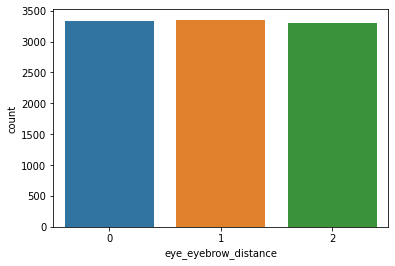

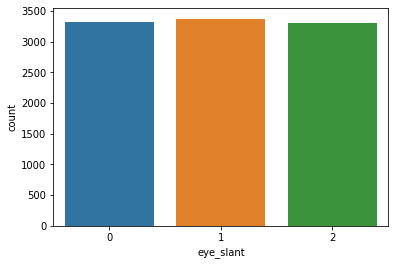

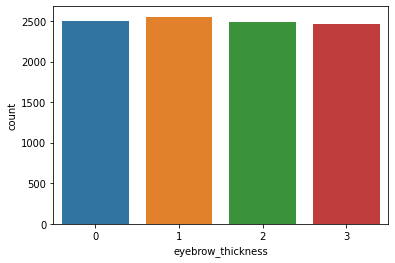

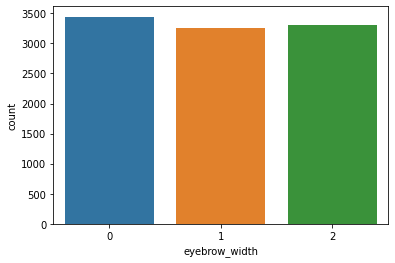

In [ ]:
for i, key in enumerate(keys):
  sns.countplot(df_cartoonset10k[key])
  plt.show()

## Color distribution

In [ ]:
keys = colors_total_variants.keys()
df_cartoonset10k[keys].astype('object').describe().transpose()

,count,unique,top,freq
eye_color,10000,5,1,2020
face_color,10000,11,10,969
glasses_color,10000,7,2,1483
hair_color,10000,10,7,1030


In [ ]:
# # Valores
# for key in keys:
#   print(df_cartoonset10k[key].value_counts())

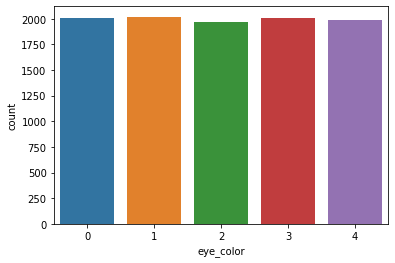

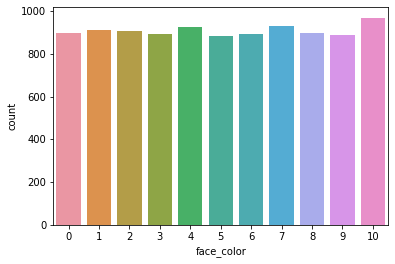

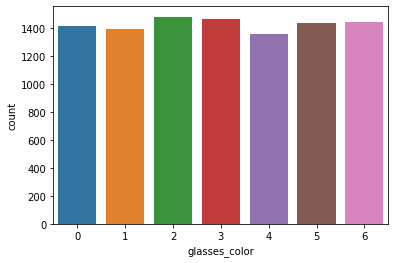

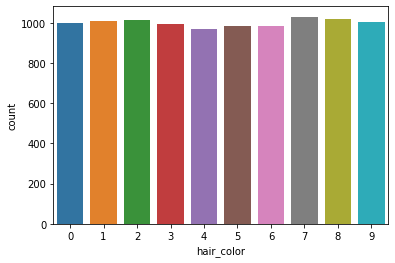

In [ ]:
for i, key in enumerate(keys):
  sns.countplot(df_cartoonset10k[key])
  plt.show()

# Show images


## Colors images

Images of different eye_color
eye_color 0


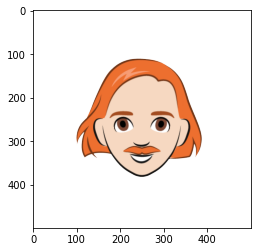

eye_color 1


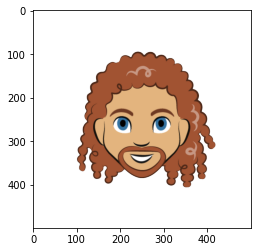

eye_color 2


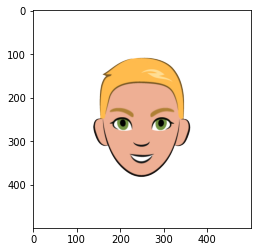

eye_color 3


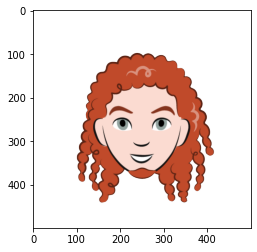

eye_color 4


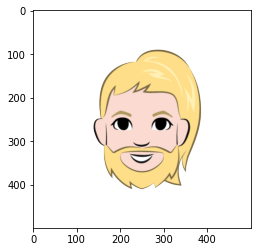



Images of different face_color
face_color 0


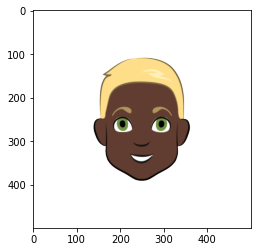

face_color 1


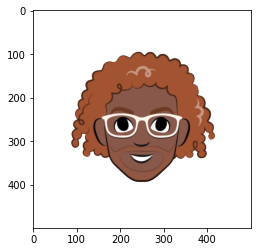

face_color 2


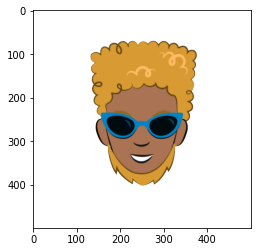

face_color 3


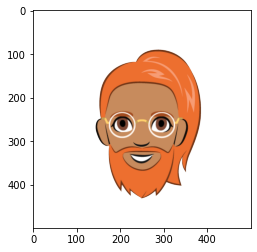

face_color 4


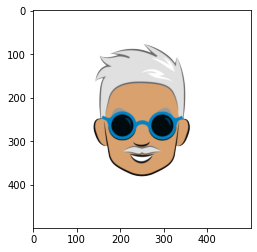

face_color 5


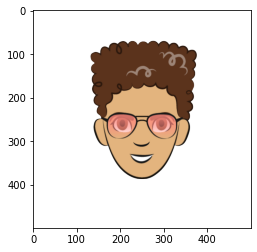

face_color 6


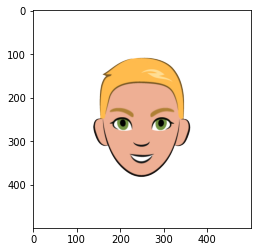

face_color 7


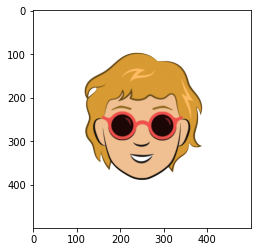

face_color 8


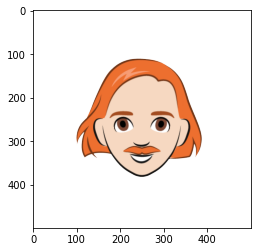

face_color 9


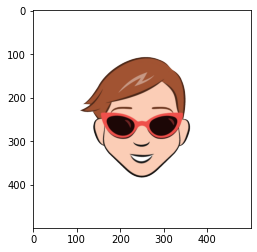

face_color 10


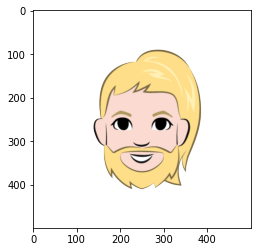



Images of different glasses_color
glasses_color 0


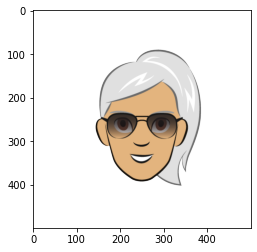

glasses_color 1


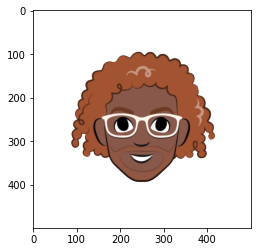

glasses_color 2


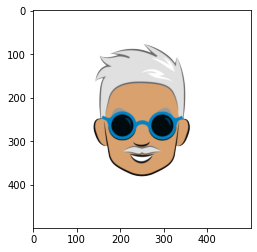

glasses_color 3


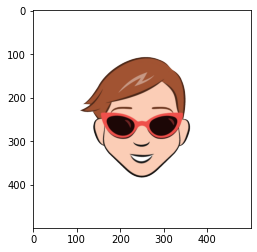

glasses_color 4


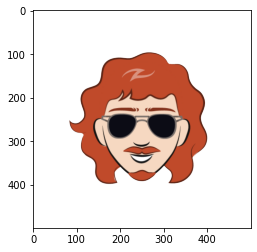

glasses_color 5


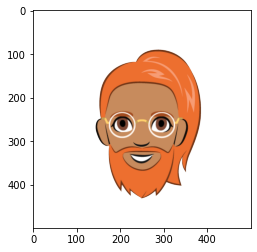

glasses_color 6


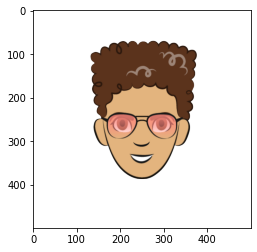



Images of different hair_color
hair_color 0


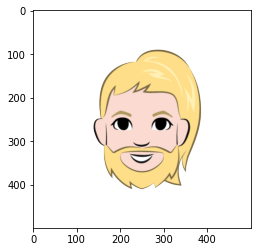

hair_color 1


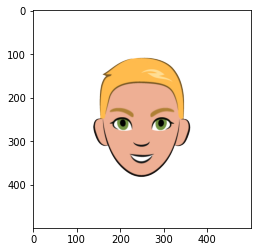

hair_color 2


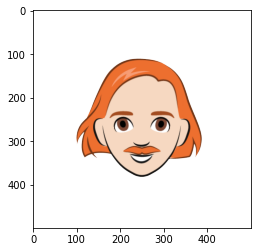

hair_color 3


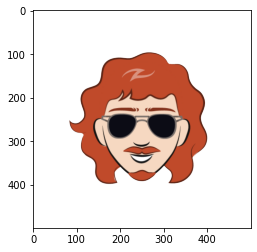

hair_color 4


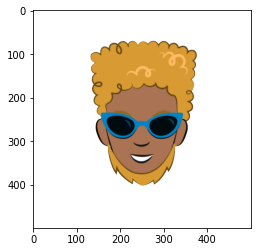

hair_color 5


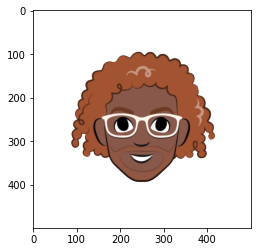

hair_color 6


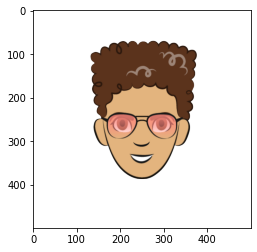

hair_color 7


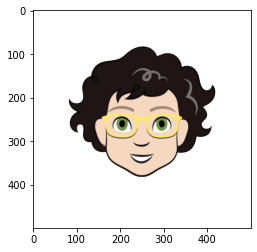

hair_color 8


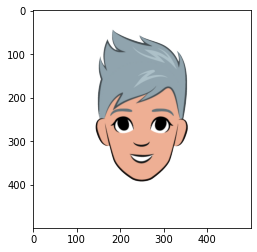

hair_color 9


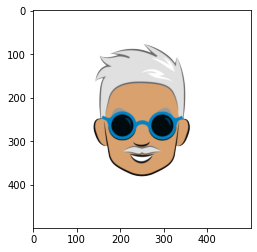

In [ ]:
colors_keys = colors_total_variants.keys()
ini_row = 2000
n = len(df_cartoonset10k)
for key in colors_keys:
  print('Images of different '+key)
  for i in range(colors_total_variants[key]):
    print(key,i)
    img = None
    for row in range(ini_row, n):
      if df_cartoonset10k.loc[row, key] == i and \
            (not(key == 'eye_color') or (df_cartoonset10k.loc[row, 'glasses'] == 11)) and \
            (not(key == 'glasses_color') or (df_cartoonset10k.loc[row, 'glasses'] != 11)):
        file_name = df_cartoonset10k.loc[row, 'file_name']
        img=mpimg.imread(
            '/content/avatar-image-generator/datasets/cartoon_datasets/cartoonset10k/'+file_name)
        break
    if img is not None:
      imgplot = plt.imshow(img)
      plt.show()
  print('\n')

## Artwork images


Images of different glasses
glasses 0


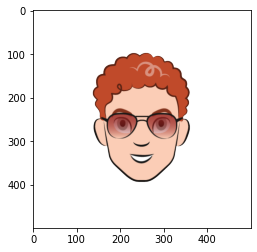

glasses 1


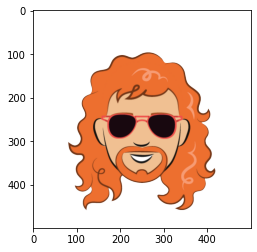

glasses 2


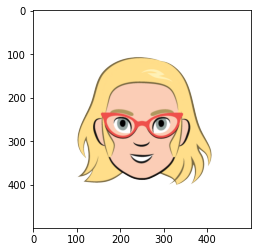

glasses 3


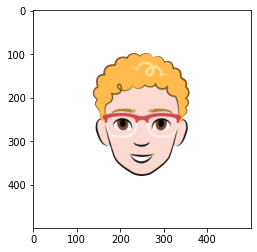

glasses 4


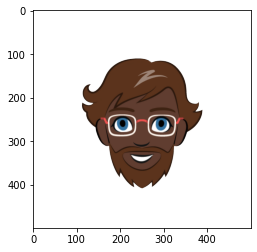

glasses 5


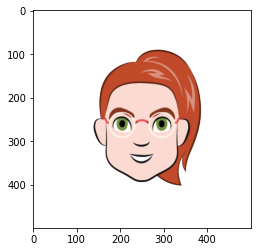

glasses 6


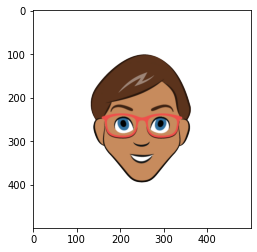

glasses 7


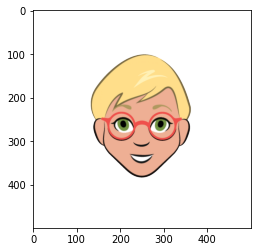

glasses 8


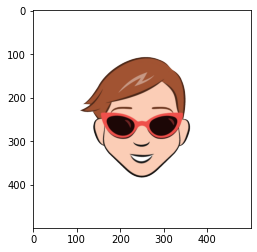

glasses 9


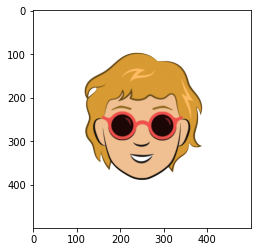

glasses 10


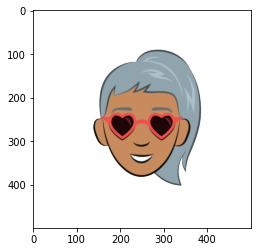

glasses 11


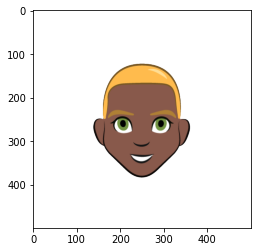

In [ ]:
keys = artwork_total_variants.keys()
ini_row = 2000
n = len(df_cartoonset10k)
glasses_color = 3 # must be in [0;6]
# for key in keys:
for key in ['glasses']:
  print('Images of different '+key)
  for i in range(artwork_total_variants[key]):
    print(key,i)
    img = None
    for row in range(ini_row, n):
      if df_cartoonset10k.loc[row, key] == i and df_cartoonset10k.loc[row, 'glasses_color'] == glasses_color:
        file_name = df_cartoonset10k.loc[row, 'file_name']
        img=mpimg.imread(
            '/content/avatar-image-generator/datasets/cartoon_datasets/cartoonset10k/'+file_name)
        break
    if img is not None:
      imgplot = plt.imshow(img)
      plt.show()
  print('\n')

# 

# Limit data

In [ ]:
df_cartoonset = pd.read_csv('/content/avatar-image-generator/datasets/cartoon_datasets/cartoonset10k_df.csv')

In [ ]:
df_cartoonset.describe()

,chin_length,eye_angle,eye_color,eye_eyebrow_distance,eye_lashes,eye_lid,eye_slant,eyebrow_shape,eyebrow_thickness,eyebrow_weight,eyebrow_width,face_color,face_shape,facial_hair,glasses,glasses_color,hair,hair_color
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.007500,1.005900,1.994000,0.996500,0.498700,0.498800,0.999100,6.511900,1.49240,0.499500,0.985700,5.029000,3.035100,10.233200,7.975100,3.005000,54.899300,4.510900
std,0.817136,0.813592,1.415403,0.815325,0.500023,0.500024,0.814104,4.026969,1.11475,0.500025,0.820952,3.174991,1.983144,4.754732,3.767585,1.997642,31.868629,2.882588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000,0.000000,0.000000,2.000000,1.000000,6.000000,5.000000,1.000000,27.000000,2.000000
50%,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.00000,0.000000,1.000000,5.000000,3.000000,14.000000,10.000000,3.000000,55.000000,5.000000
75%,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,10.000000,2.00000,1.000000,2.000000,8.000000,5.000000,14.000000,11.000000,5.000000,82.000000,7.000000
max,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,2.000000,13.000000,3.00000,1.000000,2.000000,10.000000,6.000000,14.000000,11.000000,6.000000,110.000000,9.000000


In [ ]:
df_cartoonset_limited = df_cartoonset.copy()

## Limit glasses

In [ ]:
m = len(df_cartoonset_limited)
allowed_glasses = [1, 6, 11] # (0; 11)
df_cartoonset_limited = df_cartoonset_limited.loc[df_cartoonset_limited['glasses'].isin(allowed_glasses)]
print(len(df_cartoonset_limited)/m*100,'% left of', m, 'images') 

59.11 % left of 10000 images


## Limit face color

In [ ]:
m = len(df_cartoonset_limited)
allowed_face_color = [1, 3, 5, 8, 10] # (0; 10)
df_cartoonset_limited = df_cartoonset_limited.loc[df_cartoonset_limited['face_color'].isin(allowed_face_color)]
print(len(df_cartoonset_limited)/m*100,'% left of', m, 'images') 

44.64557604466249 % left of 5911 images


## Limit hair color

In [ ]:
m = len(df_cartoonset_limited)
allowed_hair_color = [0, 3, 4, 6, 7, 9] # (0; 9)
df_cartoonset_limited = df_cartoonset_limited.loc[df_cartoonset_limited['hair_color'].isin(allowed_hair_color)]
print(len(df_cartoonset_limited)/m*100,'% left of', m, 'images') 

60.81849185297461 % left of 2639 images


## Export limited dataframe

In [ ]:
print(len(df_cartoonset_limited)/len(df_cartoonset)*100,'% left of', len(df_cartoonset), 'images')

16.05 % left of 10000 images
